# ALY6140 Capstone Project - Triple A+ Pro Max

# 1. Importing the Libraries

In [1]:
# Importing necessary libraries
import warnings 
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dcor

# Data cleaning module
import Data_Clean as DC

# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr

# Importing  the chi-square test (chi2_contingency) and independent two-sample t-test (ttest_ind) 
# from the scipy.stats and statsmodels.stats.weightstats libraries
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ttest_ind

# Importing the Spearman rank-order correlation coefficient from the scipy.stats library
from scipy.stats import spearmanr

# Machine learning libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


# Boosting algorithm
import xgboost as xgb

# SHAP (SHapley Additive exPlanations) for model interpretability
import shap
shap.initjs()

# 2. Loading the Data

In [2]:
# Reading hotel bookings data from a CSV file into a Pandas DataFrame
Hotel = pd.read_csv("hotel_booking.csv")

# Displaying information about the dataset, such as column data types and non-null counts
Hotel.info()

# Generating descriptive statistics of the dataset, rounded to two decimal places
Hotel.describe().round(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119389 entries, 0 to 119388
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119385 non-null  float64
 11  babies                          119389 non-null  int64  
 12  meal            

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
count    119389.00  119389.00          119389.00                 119389.00   
mean          0.37     104.01            2016.16                     27.17   
std           0.48     106.86               0.71                     13.61   
min           0.00       0.00            2015.00                      1.00   
25%           0.00      18.00            2016.00                     16.00   
50%           0.00      69.00            2016.00                     28.00   
75%           1.00     160.00            2017.00                     38.00   
max           1.00     737.00            2017.00                     53.00   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count                  119389.00                119389.00   
mean                       15.80                     0.93   
std                         8.78                     1.00   
min                         1.00                     0.00   
25%                         8.00                     0.00   
50%                        16.00                     1.00   
75%                        23.00                     2.00   
max                        31.00                    19.00   

       stays_in_week_nights     adults  children     babies  \
count             119389.00  119389.00  119385.0  119389.00   
mean                   2.50       1.86       0.1       0.01   
std                    1.91       0.58       0.4       0.10   
min                    0.00       0.00       0.0       0.00   
25%                    1.00       2.00       0.0       0.00   
50%                    2.00       2.00       0.0       0.00   
75%                    3.00       2.00       0.0       0.00   
max                   50.00      55.00      10.0      10.00   

       is_repeated_guest  previous_cancellations  \
count          119389.00               119389.00   
mean                0.03                    0.09   
std                 0.18                    0.84   
min                 0.00                    0.00   
25%                 0.00                    0.00   
50%                 0.00                    0.00   
75%                 0.00                    0.00   
max                 1.00                   26.00   

       previous_bookings_not_canceled  booking_changes      agent  company  \
count                       119389.00        119389.00  103049.00  6797.00   
mean                             0.14             0.22      86.69   189.27   
std                              1.50             0.65     110.77   131.66   
min                              0.00             0.00       1.00     6.00   
25%                              0.00             0.00       9.00    62.00   
50%                              0.00             0.00      14.00   179.00   
75%                              0.00             0.00     229.00   270.00   
max                             72.00            21.00     535.00   543.00   

       days_in_waiting_list        adr  required_car_parking_spaces  \
count             119389.00  119389.00                    119389.00   
mean                   2.32     101.79                         0.06   
std                   17.59      48.15                         0.25   
min                    0.00      -6.38                         0.00   
25%                    0.00      69.29                         0.00   
50%                    0.00      94.56                         0.00   
75%                    0.00     126.00                         0.00   
max                  391.00     510.00                         8.00   

       total_of_special_requests  
count                  119389.00  
mean                        0.57  
std                         0.79  
min                         0.00  
25%                         0.00  
50%                         0.00  
75%                         1.00  
max                         5.00

# 3. Data Cleaning

3.1 Checking for Missing Values

In [3]:
# Removing missing values from the Hotel dataset using the custom function
Hotel = DC.remove_missing_value(Hotel)

The shape of the original Hotel dataset is (119389, 32)
Missing Values: children 4
Missing Values: country 488
Missing Values: agent 16340
Missing Values: company 112592
children     0.003%
country      0.409%
agent       13.686%
company     94.307%
dtype: object 

2 columns were removed.
492 rows were removed.
After removing those missing rows and columns, the shape of the Hotel dataset is (118897, 30)


3.2 Remove Duplicates Data

In [4]:
# Removing duplicate rows from the Hotel dataset using the custom function
Hotel = DC.remove_duplicates_data(Hotel)

The Hotel dataset had 31984 duplicated rows. After removing those duplicated rows, 
the shape of the Hotel dataset is (86913, 30)


3.3 Remove Zero People Booking Data

In [5]:
# Removing rows where the counts of adults, children, and babies are all zero from the Hotel dataset using the custom function
Hotel = DC.remove_zero_people_booking(Hotel)

After filtering out rows where the counts of adults, children, and babies are all zero, 
the Hotel dataset has been streamlined to a new shape of (86752, 30)


# 4. EDA

4.1 Target

In [6]:
# Plotting a count distribution of the target variable 'is_canceled'
ax = sns.countplot(x='is_canceled', data=Hotel, palette=['skyblue', 'lightpink'])
plt.title('Distribution of Target Variable')
plt.xlabel('Is Canceled (0 = Not Canceled, 1 = Canceled)')
plt.ylabel('Count')

# Adding percentage annotations to each bar in the plot
total = len(Hotel['is_canceled'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(f'{int(p.get_height())} ({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Displaying the plot
plt.show()


4.2 Categorical Variables

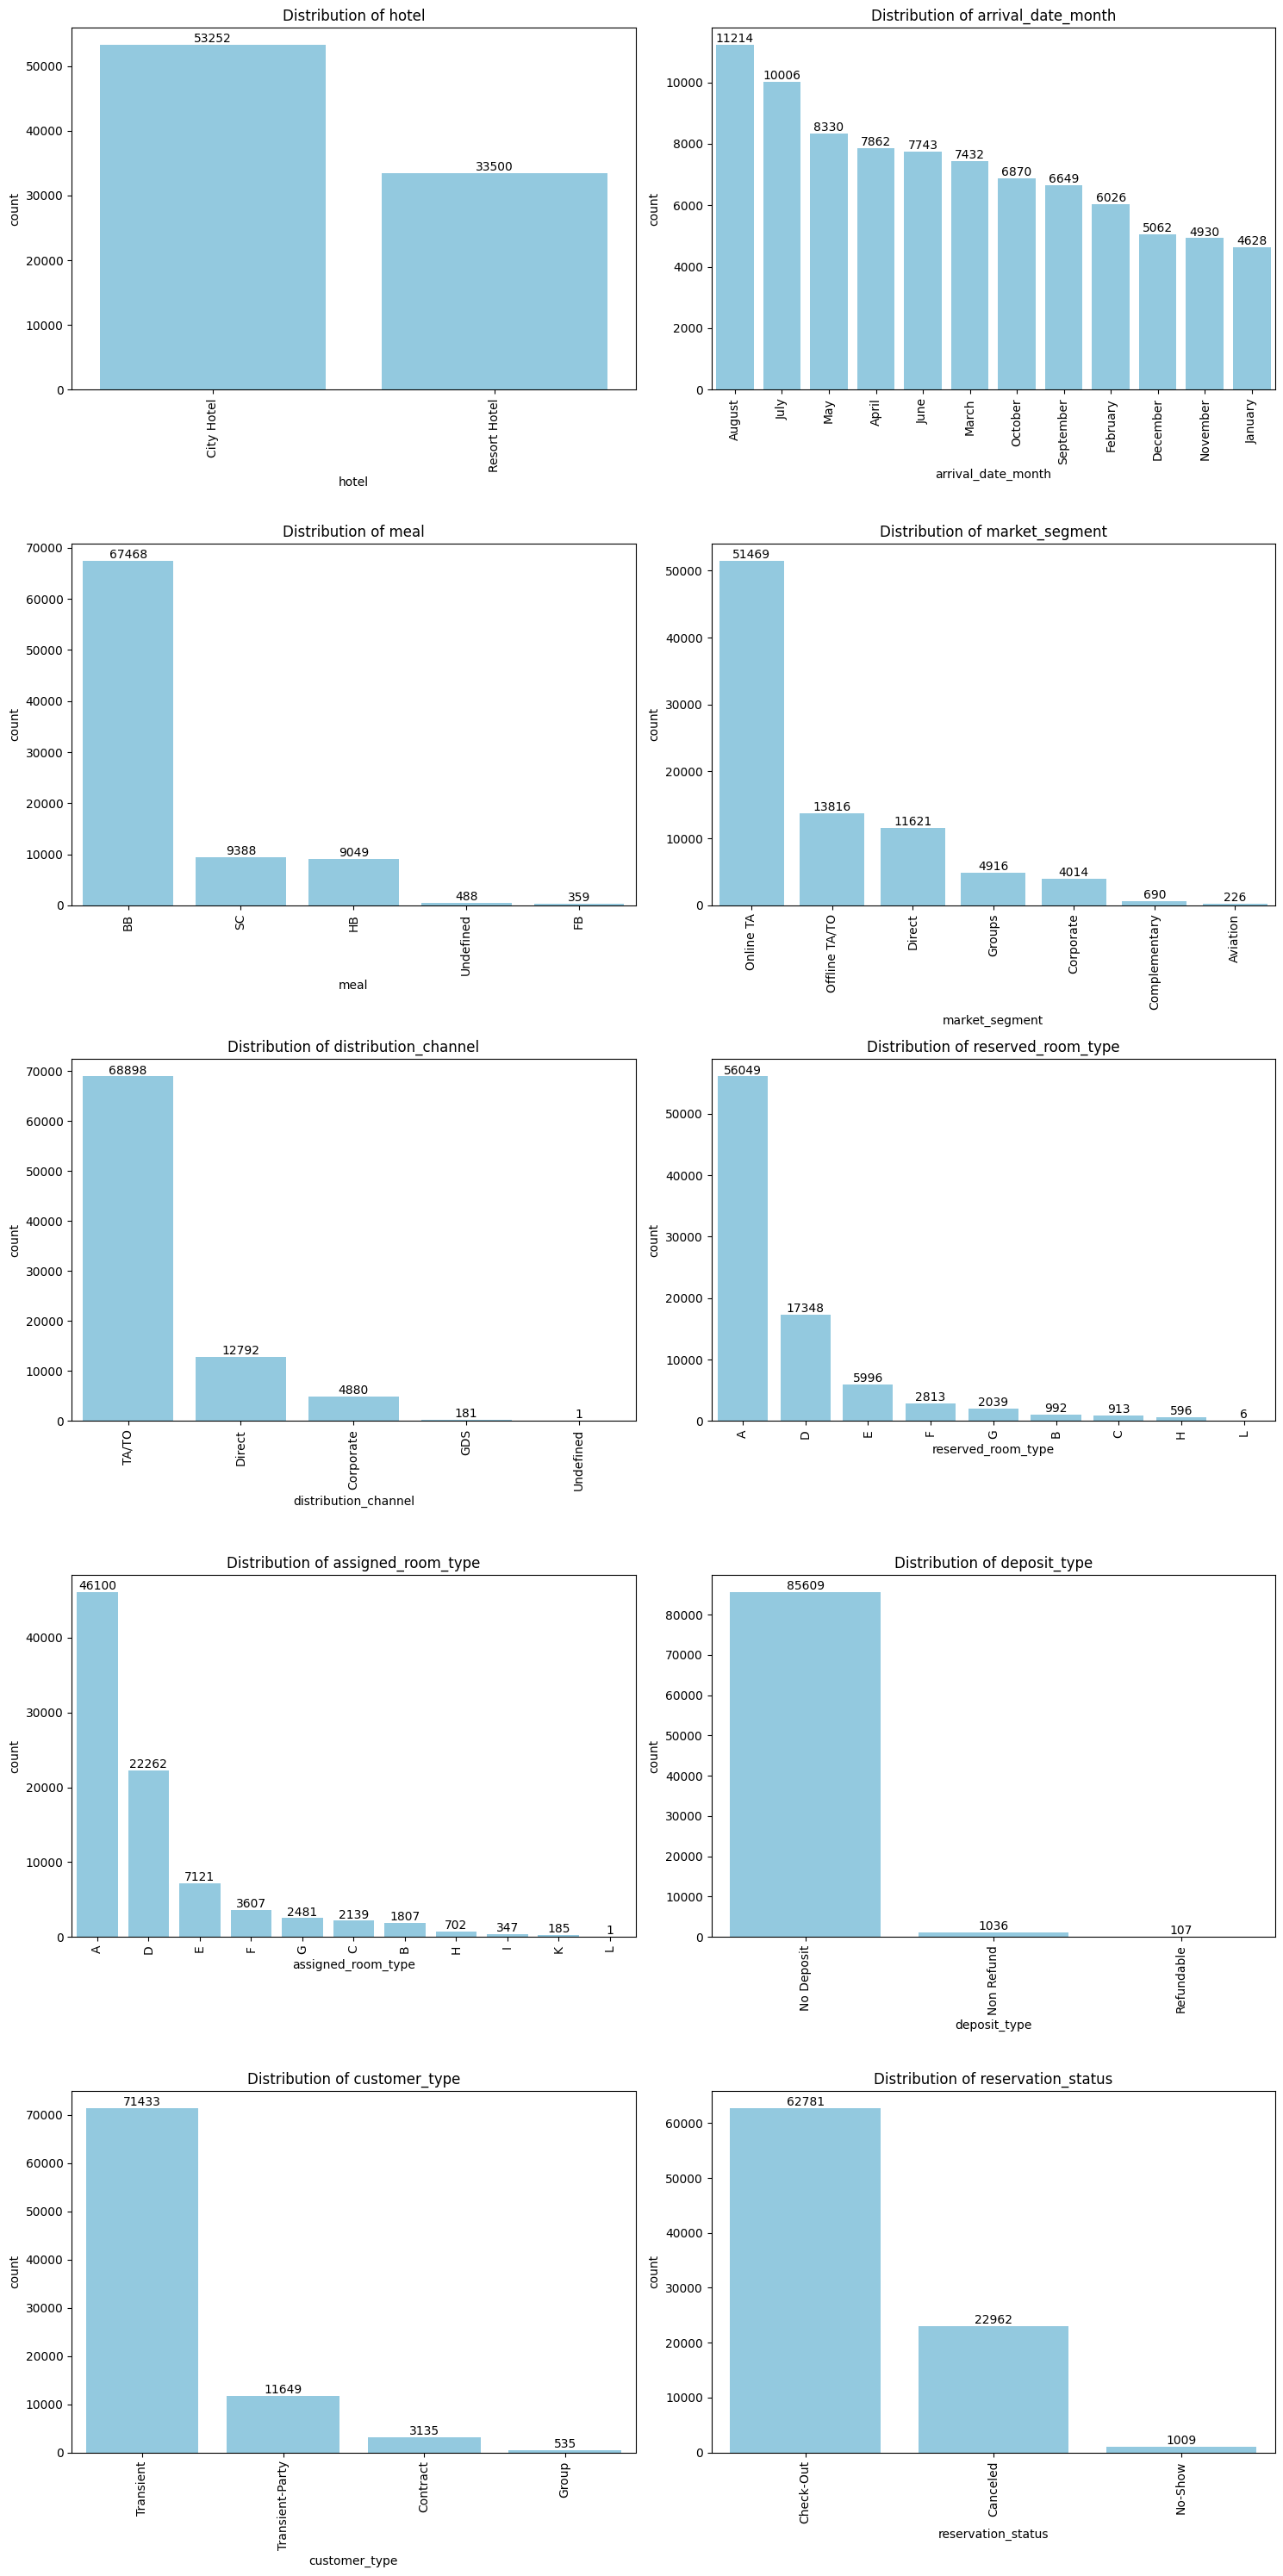

In [7]:
# Plotting the distribution of categorical columns in the Hotel dataset
# Each subplot represents a different categorical column

# Specifying the categorical columns of interest
cate_cols = ["hotel", "arrival_date_month", "meal", "market_segment", "distribution_channel", 
             'reserved_room_type','assigned_room_type', "deposit_type", "customer_type", 'reservation_status']

# Setting up the figure and subplots
plt.figure(figsize=(15, 30))  

# Iterating through each categorical column and creating subplots
for i, col in enumerate(cate_cols, 1):
    plt.subplot(5, 2, i)
    
    # Ordering the data for better visualization
    ordered_data = Hotel[col].value_counts().index
    ax = sns.countplot(x=col, data=Hotel, order=ordered_data, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)

    # Annotating the value numbers on the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()


In [8]:
# Plotting the cancellation rate for each category within categorical columns
# Each subplot represents the cancellation rate for a different categorical column

# Specifying the number of rows for subplots
rows_num = 5  

# Setting up the figure and subplots
plt.figure(figsize=(15, 30))

# Iterating through each categorical column and creating subplots
for i, col in enumerate(cate_cols, 1):
    plt.subplot(rows_num, 2, i)

    # Calculating cancellation rate for each category within the column
    cancellation_rate = Hotel.groupby(col)["is_canceled"].mean().reset_index().sort_values(by="is_canceled", ascending=False)
    g = sns.barplot(data=cancellation_rate, x=col, y="is_canceled", color="pink")
    g.set_ylim(0, 1)
    plt.title(f"Cancelation rate by {col} column", fontdict={'fontsize': 14})

    # Annotating the cancellation rate values on the bars
    for p in g.patches:
        g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
        plt.xticks(rotation=90)

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()


In [9]:
# Aggregating data to count the number of guests from each country
country_guest_data = Hotel['country'].value_counts().reset_index()
country_guest_data.columns = ['country', 'guest_count']

# Creating a choropleth map to visualize the distribution of guests by country
guest_map = px.choropleth(country_guest_data,
                          locations='country',
                          color='guest_count',
                          hover_name='country',
                          color_continuous_scale=px.colors.sequential.Viridis_r,
                          title='Home Country of Guests')

# Adjusting the size and title position of the map for better display
guest_map.update_layout(width=800, height=600, title_x=0.5)
guest_map.show()

In [10]:
# Selecting the top countries with the highest number of guests
top_countries = 10
top_country_guest_data = Hotel['country'].value_counts().head(top_countries).reset_index()
top_country_guest_data.columns = ['country', 'guest_count']

# Creating a bar chart to visualize the number of guests in the top countries
bar_chart = px.bar(top_country_guest_data,
                   x='country',
                   y='guest_count',
                   text='guest_count',  
                   color='guest_count',
                   color_continuous_scale='Viridis_r',  
                   labels={'guest_count': 'Number of Guests'},
                   title='Top Countries of Guests (Top 10)')

# Adjusting the size and title position of the chart for better display
bar_chart.update_layout(width=800, height=600, title_x=0.5)

# Displaying the chart
bar_chart.show()


In [11]:
# Plotting the count of canceled and not canceled bookings per month
plt.figure(figsize=(12, 6))
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Creating a count plot with hue representing the cancellation status
sns.countplot(x='arrival_date_month', data=Hotel, hue='is_canceled', order=months_order, palette=["skyblue", "lightpink"])
plt.title("Canceled and Not Canceled Bookings per Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])

# Displaying the plot
plt.show()


In [12]:
# Hypothesis Testing
# Whethter there is a significant difference in the number of not-canceled bookings across different months.

# Convert 'arrival_date_month' to categorical to maintain the order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Hotel['arrival_date_month'] = pd.Categorical(Hotel['arrival_date_month'], categories=months_order, ordered=True)

# Create a 2x2 contingency table
contingency_table = pd.crosstab(Hotel['arrival_date_month'], Hotel['is_canceled'] == 0)

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
sig_level = 0.05
if p_value < sig_level:
    print("Reject the null hypothesis. There is a significant difference in the number of not-canceled bookings across different months.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of not-canceled bookings across different months.")

Chi-squared value: 614.2674746083144
P-value: 1.241705952218739e-124
Reject the null hypothesis. There is a significant difference in the number of not-canceled bookings across different months.


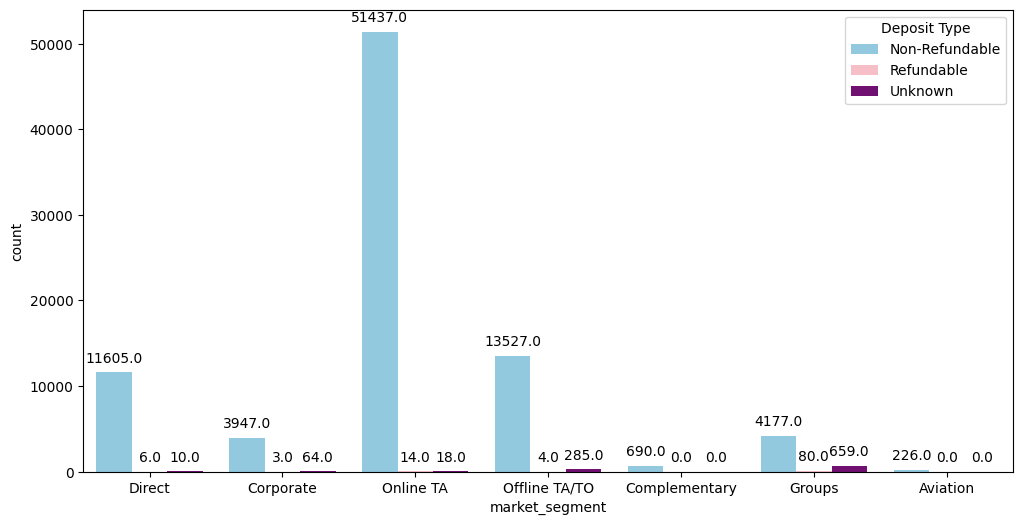

In [13]:
# Plotting a count of market segments with hue representing deposit types
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=Hotel, x='market_segment', hue='deposit_type', palette=["skyblue", "lightpink", 'purple'])
plt.legend(title='Deposit Type', labels=['Non-Refundable', 'Refundable', 'Unknown'])

# Annotating the value numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Displaying the plot
plt.show()


4.3 Numercial Variables

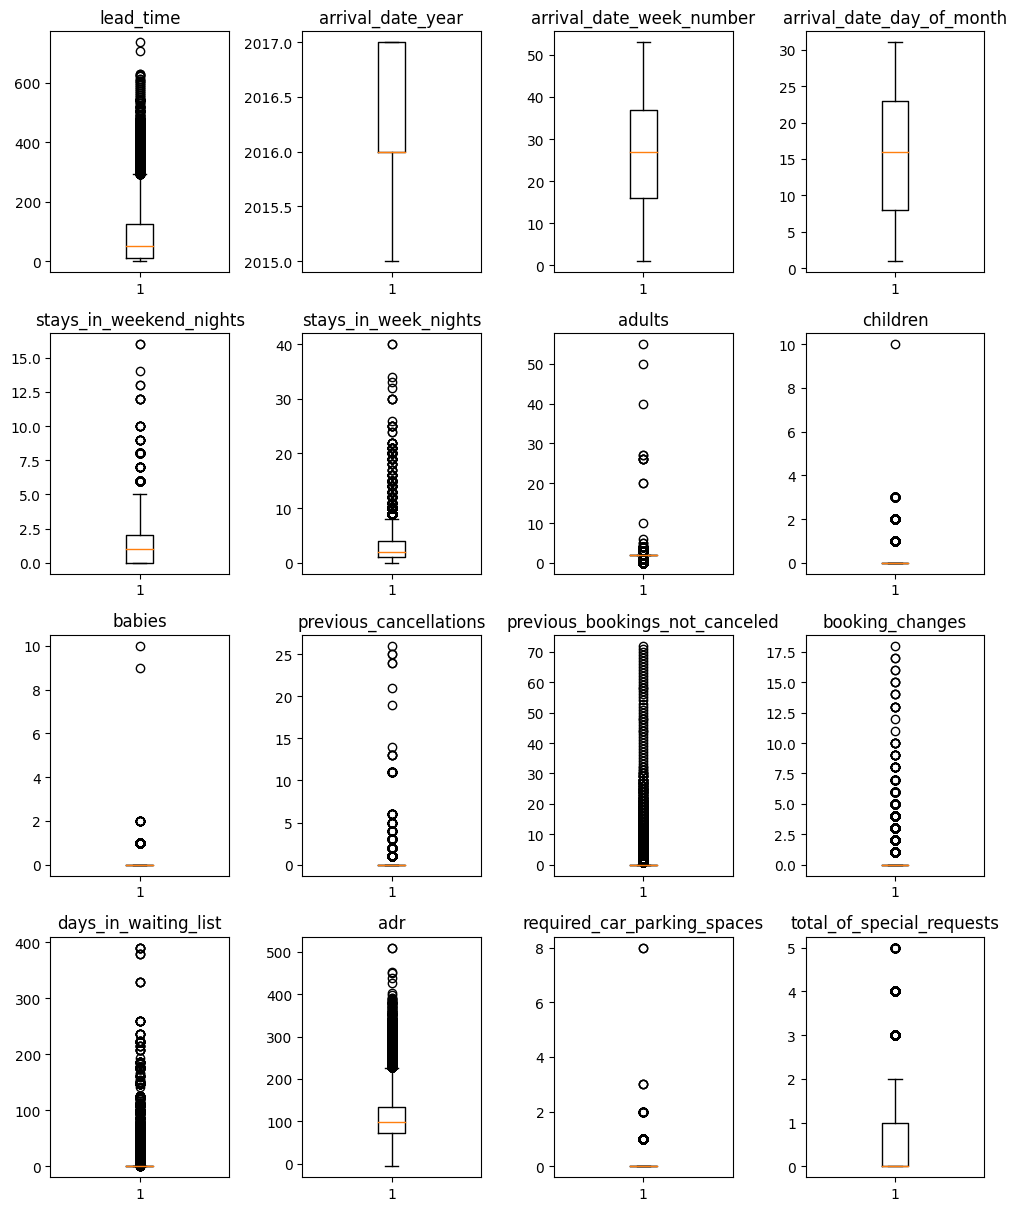

In [14]:
# Plotting boxplots for numeric columns in the Hotel dataset
# Excluding 'is_canceled' and 'is_repeated_guest' columns from the numeric data
numeric_data = Hotel.select_dtypes(include=[np.number])
numeric_data.drop(["is_canceled", "is_repeated_guest"], axis=1, inplace=True)

# Setting up the figure and subplots
plt.figure(figsize=(10, 15))
num_rows = 5
num_cols_per_row = 4

# Iterating through each numeric column and creating boxplots
for i, col in enumerate(numeric_data.columns, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    plt.boxplot(numeric_data[col].dropna())
    plt.title(col)

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()


In [15]:
# Plotting the distribution of 'adr' (Average Daily Rate) by cancellation status
plt.figure(figsize = (10, 6))
sns.histplot(data = Hotel, x = "adr", hue = "is_canceled", multiple = "stack", palette = ["skyblue", "lightpink"], binwidth = 5)
plt.title("Distribution of ADR by Cancellation")
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Count")
plt.show()

In [16]:
# Plotting a histogram of Average Daily Rate (ADR) with stacked bars for cancellation status
plt.figure(figsize=(10, 6))
sns.histplot(data=Hotel, x="adr", hue="is_canceled", multiple="stack", palette=["skyblue", "lightpink"], binwidth=5)

plt.title("Distribution of ADR by Cancellation")
plt.xlabel("Average Daily Rate (ADR)")
plt.ylabel("Count")

# Setting the x-axis limit for better visibility
plt.xlim(0, 300)  

# Displaying the plot
plt.show()


In [17]:
# Hypothesis Testing
# Whethter the mean adr for not-canceled and canceled bookings is significantly different.

# Separate adr values for not-canceled and canceled bookings
adr_not_canceled = Hotel[Hotel['is_canceled'] == 0]['adr']
adr_canceled = Hotel[Hotel['is_canceled'] == 1]['adr']

# run the test
tstat, pvalue, df = ttest_ind(x1=adr_not_canceled, 
                              x2=adr_canceled, 
                              alternative='two-sided', value=0)

print(f'The t-statistic is: {round(tstat, 3)}')
print(f'The p-value is: {round(pvalue, 3)}')

# Interpret the results
sig_level = 0.05
if pvalue < sig_level:
    print("Reject the null hypothesis. The mean adr for not-canceled and canceled bookings is significantly different.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean adr between not-canceled and canceled bookings.")

The t-statistic is: -38.961
The p-value is: 0.0
Reject the null hypothesis. The mean adr for not-canceled and canceled bookings is significantly different.


In [18]:
# Create the 'total_stay' column
Hotel['total_stay'] = Hotel['stays_in_weekend_nights'] + Hotel['stays_in_week_nights']

# Set the figure size
plt.figure(figsize=(12, 6))

# Draw the histogram and kernel density estimate (KDE) plot, adjusting the y-axis for KDE
sns.histplot(Hotel['total_stay'], bins=50, kde=True, stat='density', color='skyblue')

# Draw the KDE plot separately, setting the trend line color
sns.kdeplot(Hotel['total_stay'], color='green')

# Set the title and axis labels
plt.title('Distribution of Total Length of Stay at the Hotel')
plt.xlabel('Total Stay (Nights)')
plt.ylabel('Density')  # Set y-axis label to Density

# Show the plot
plt.show()

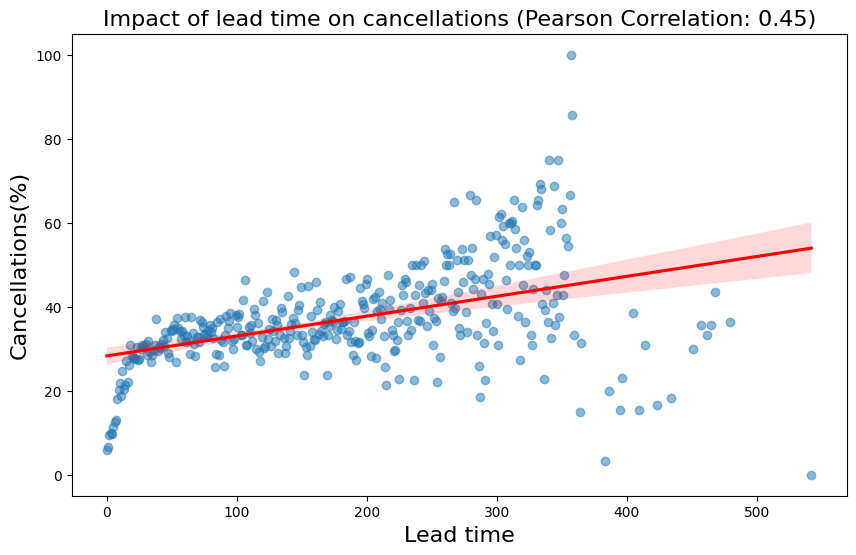

In [19]:
lead_cancel_data =  Hotel.groupby("lead_time")["is_canceled"].describe()

# Filter out groups with at least 10 observations
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(lead_cancel_data_10.index, lead_cancel_data_10["mean"])

# Displaying the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100,scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Impact of lead time on cancellations (Pearson Correlation: {pearson_corr:.2f})", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancellations(%)", fontsize=16)
plt.show()

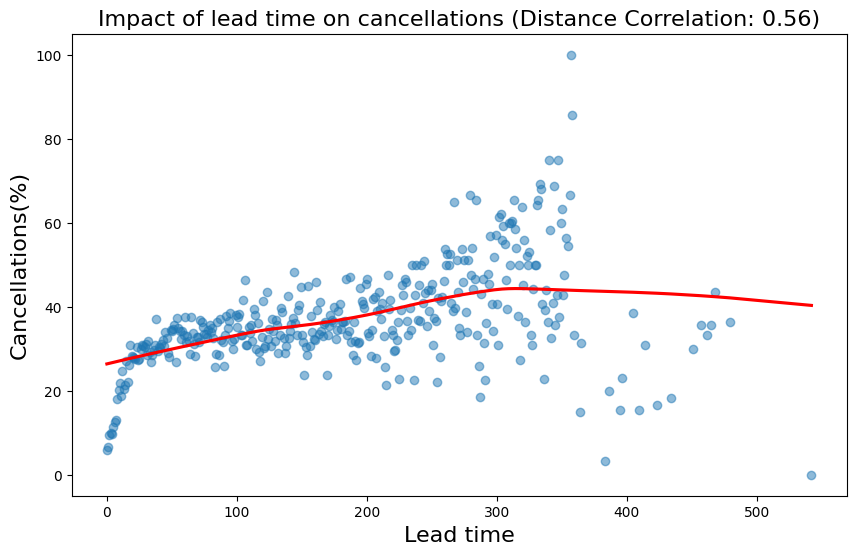

In [20]:
# Calculate Distance correlation coefficient
distance_corr_value = dcor.distance_correlation(lead_cancel_data_10.index, lead_cancel_data_10["mean"])

plt.figure(figsize=(10, 6))
sns.regplot(
    x=lead_cancel_data_10.index,
    y=lead_cancel_data_10["mean"].values * 100,
    lowess=True,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title(f"Impact of lead time on cancellations (Distance Correlation: {distance_corr_value:.2f})", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancellations(%)", fontsize=16)

#Displaying the plot
plt.show()


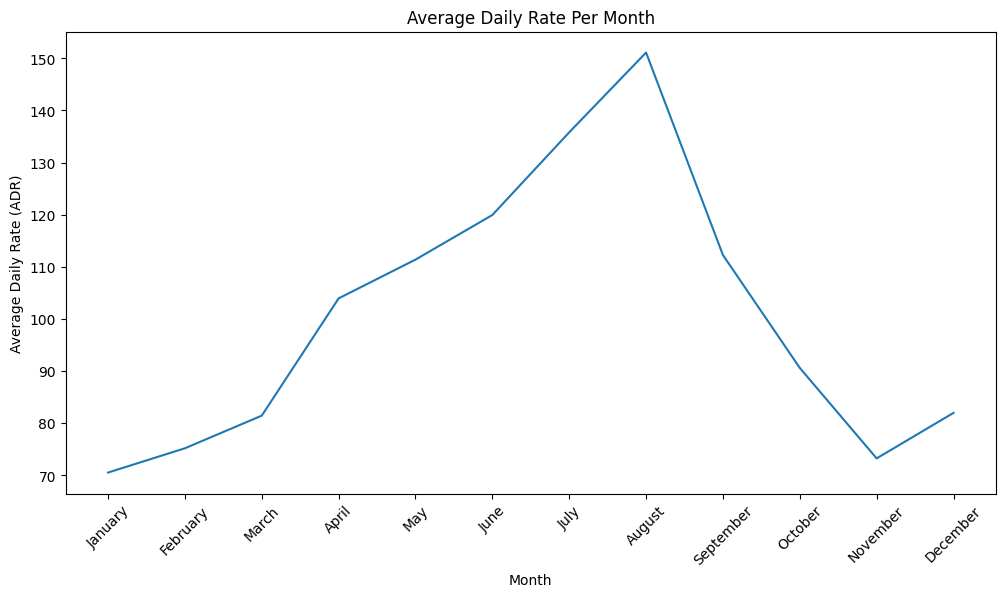

In [21]:
# Converting 'arrival_date_month' to an ordered categorical variable with specified order
Hotel['arrival_date_month'] = pd.Categorical(Hotel['arrival_date_month'], 
                                             categories=months_order, 
                                             ordered=True)

# Calculating the monthly average daily rate (ADR) and creating a line chart
monthly_adr = Hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_adr, x='arrival_date_month', y='adr')
plt.title('Average Daily Rate Per Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)  

# Displaying the plot
plt.show()


# 5. Test

5.1 HeatMap

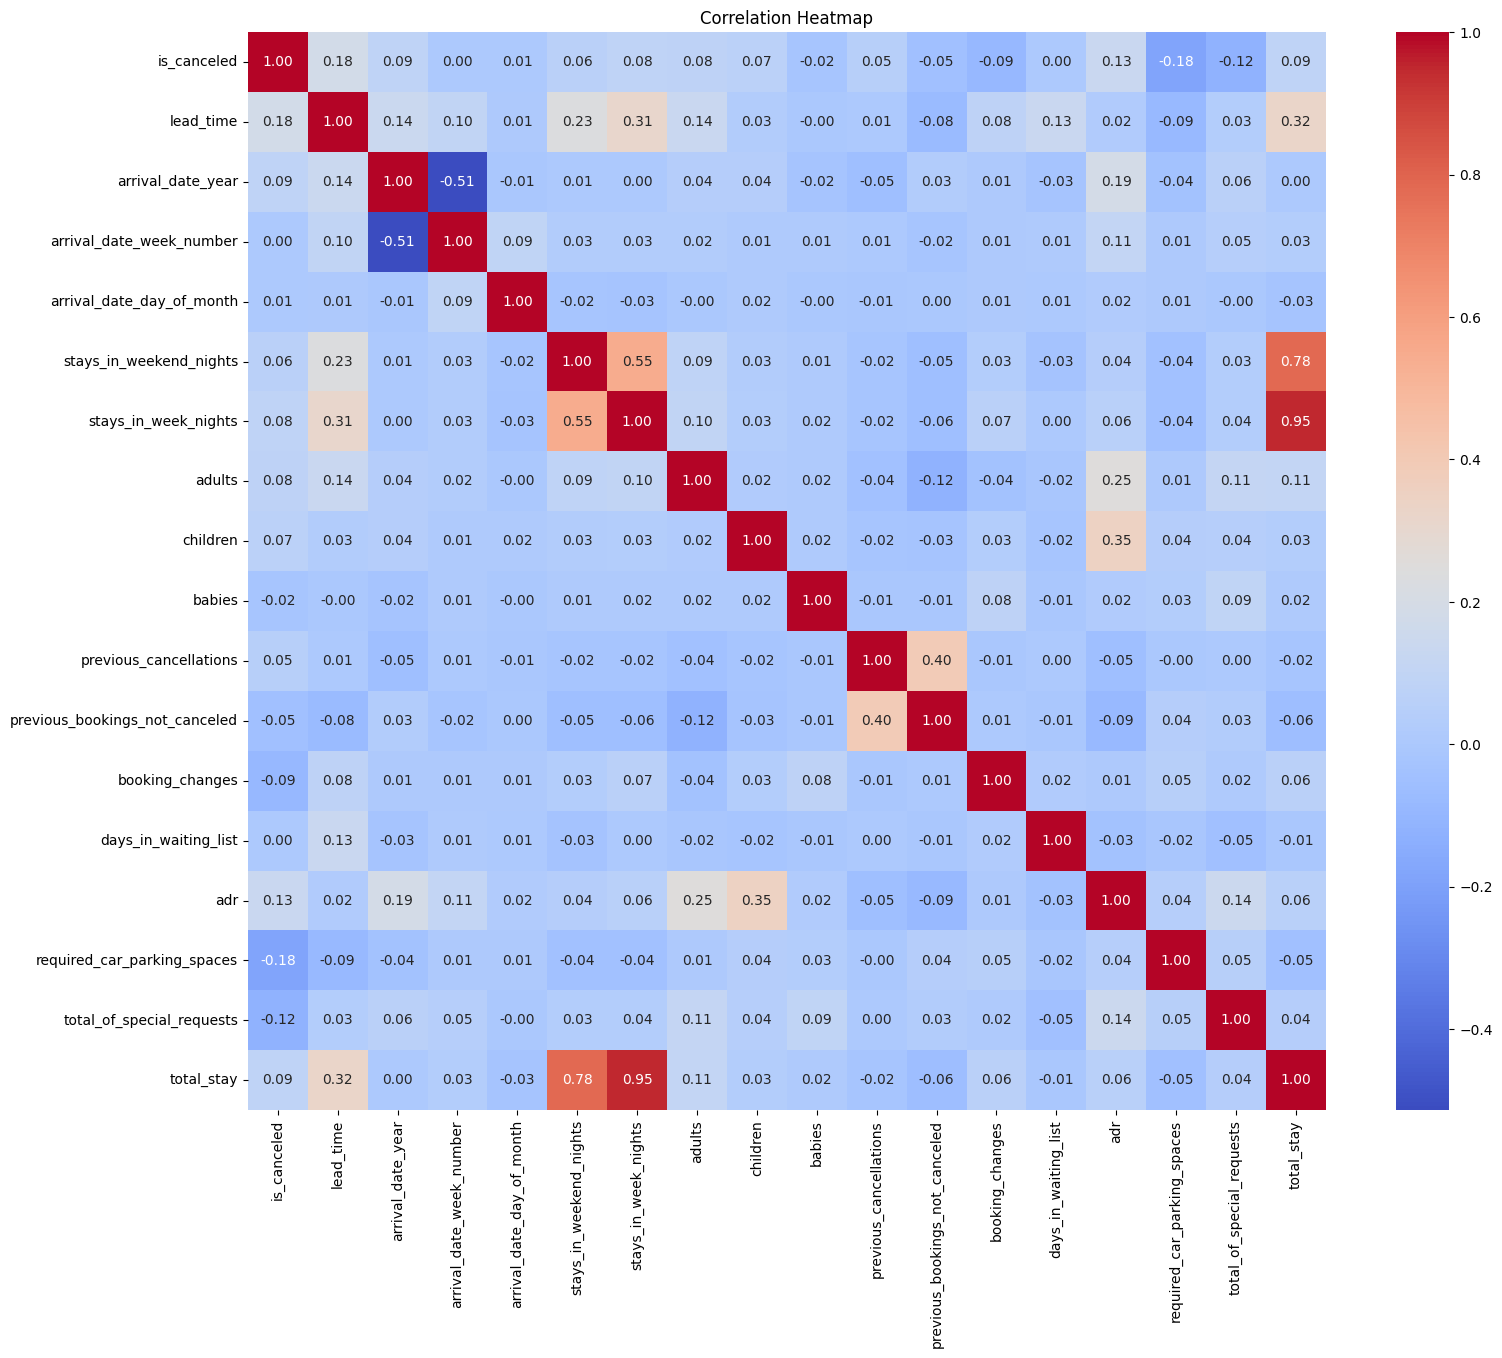

is_canceled                       1.000000
required_car_parking_spaces       0.184012
lead_time                         0.183294
adr                               0.131138
total_of_special_requests         0.122132
booking_changes                   0.093716
arrival_date_year                 0.087730
total_stay                        0.085190
stays_in_week_nights              0.084002
adults                            0.078322
children                          0.066793
stays_in_weekend_nights           0.060392
previous_cancellations            0.050988
previous_bookings_not_canceled    0.050591
babies                            0.021041
arrival_date_day_of_month         0.005308
days_in_waiting_list              0.004537
arrival_date_week_number          0.001108
Name: is_canceled, dtype: float64


In [22]:
Hotel_Linear = Hotel.copy()
Hotel_Linear = Hotel_Linear.drop(['is_repeated_guest'], axis=1)
correlation_matrix = Hotel_Linear.corr()
plt.figure(figsize = (18,14))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", square = True)
plt.title("Correlation Heatmap")
plt.show()

correlation_matrix = Hotel_Linear.corr()
correlation_with_target = correlation_matrix['is_canceled'].abs().sort_values(ascending = False)
print(correlation_with_target)

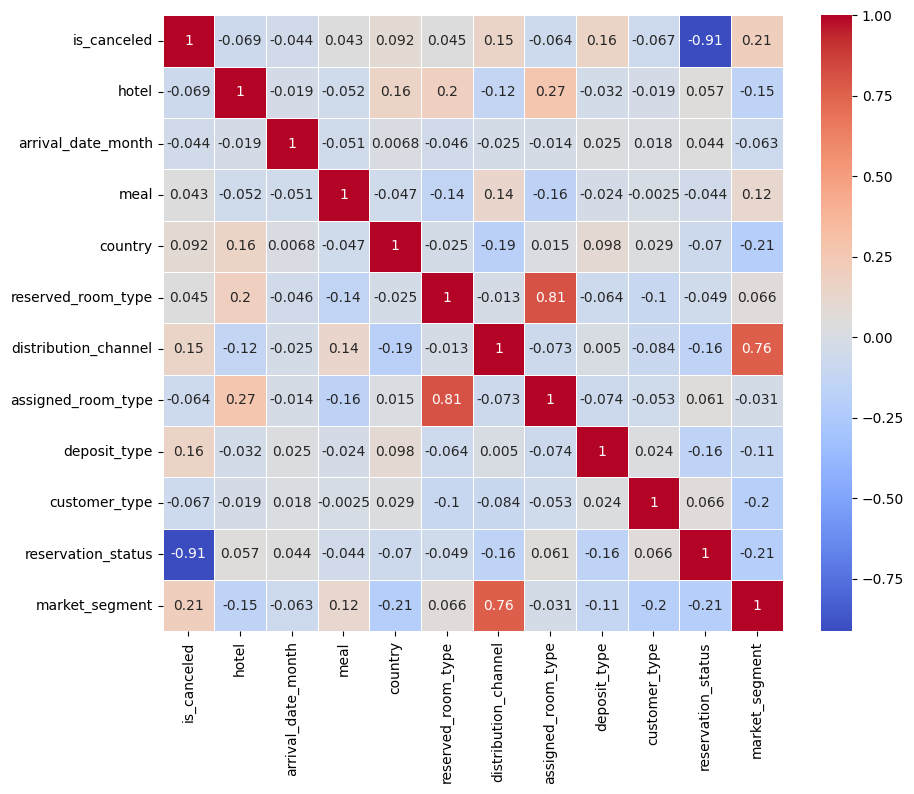

is_canceled             1.000000
reservation_status      0.913873
market_segment          0.205317
deposit_type            0.156047
distribution_channel    0.150222
country                 0.091847
hotel                   0.069497
customer_type           0.066915
assigned_room_type      0.064030
reserved_room_type      0.044941
arrival_date_month      0.044369
meal                    0.043319
dtype: float64


In [23]:
# Create a copy of the original Hotel dataset
Hotel_Non_Linear = Hotel.copy()

# Assuming Hotel_Non_Linear is your DataFrame
features = ["is_canceled", "hotel", "arrival_date_month", "meal", "country", "reserved_room_type", 
            "distribution_channel", "assigned_room_type", "deposit_type", "customer_type", 
            "reservation_status", "market_segment"]

# Initialize an empty correlation matrix
correlation_matrix = pd.DataFrame(index=features, columns=features)

# Calculate Spearman correlation for each pair of features
for feature1 in features:
    for feature2 in features:
        correlation, _ = spearmanr(Hotel_Non_Linear[feature1], Hotel_Non_Linear[feature2])
        correlation_matrix.loc[feature1, feature2] = correlation

# Set font size for annotation
font_size = 10

# Plot the heatmap with the Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5,
            annot_kws={"size": font_size})
plt.show()

# Calculate Spearman correlation with the target variable
spearman_correlation_with_target = pd.Series(index=features)

for feature in features:
    correlation, _ = spearmanr(Hotel_Non_Linear[feature], Hotel_Non_Linear['is_canceled'])
    spearman_correlation_with_target[feature] = abs(correlation)

# Sort the results in descending order
spearman_correlation_with_target = spearman_correlation_with_target.sort_values(ascending=False)

# Print the results
print(spearman_correlation_with_target)

5.2 Balance Data

In [24]:
# Creating a balanced dataset by label encoding categorical columns and balancing the 'is_canceled' classes

# Creating a copy of the Hotel dataset
Hotel_DV = Hotel.copy()

# Using LabelEncoder to encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ["hotel", "arrival_date_month", "meal", "country", "distribution_channel", 
                       "reserved_room_type", "distribution_channel", "assigned_room_type", 
                       "deposit_type", "customer_type", "reservation_status", "market_segment"]

for column in categorical_columns:
    Hotel_DV[column] = label_encoder.fit_transform(Hotel_DV[column])

# Displaying the count of 'is_canceled' values before balancing
print(Hotel_DV["is_canceled"].value_counts())

# Balancing the dataset by undersampling the majority class (is_canceled = 0)
canceled_1 = Hotel_DV[Hotel_DV["is_canceled"] == 1]
count_canceled_1 = canceled_1.shape[0]
canceled_0 = Hotel_DV[Hotel_DV["is_canceled"] == 0].sample(n=count_canceled_1, random_state=42)
balanced_dataset = pd.concat([canceled_1, canceled_0])

# Shuffling the balanced dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Displaying the count of 'is_canceled' values after balancing
print("\nAfter Balancing Data")
print(balanced_dataset["is_canceled"].value_counts())

0    62781
1    23971
Name: is_canceled, dtype: int64

After Balancing Data
0    23971
1    23971
Name: is_canceled, dtype: int64


In [25]:
# Creating feature matrix (X) and target variable (y) from the balanced dataset
X = balanced_dataset.drop(['is_canceled', 'reservation_status_date', 'reservation_status'], axis=1)
y = balanced_dataset['is_canceled']

# Split the dataset into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model

In [26]:
# Define Features and VIF as transformers
class LogisticRegressionFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        lr_model = LogisticRegression()
        lr_model.fit(X, y)

        # Displaying feature coefficients sorted in descending order
        self.feature_coefficients_ = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(ascending=False)
        return self

    def transform(self, X):
        return X[self.feature_coefficients_.index], self.feature_coefficients_

class LogisticRegressionVIF(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Calculating Variance Inflation Factor (VIF) for each feature in the feature matrix (X)
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Sorting the VIF values in descending order
        self.vlf_value_ = vif_data.sort_values(ascending=False, by='VIF')
        return self

    def transform(self, X):
        return X[self.vlf_value_['feature']], self.vlf_value_

In [27]:
# Creating a pipeline with the Features and VIF transformers
pipe = make_pipeline(
    LogisticRegressionFeatures(),
    LogisticRegressionVIF()
)

# Fit and transform the data using the pipeline
result_features, feature_coefficients = pipe.named_steps['logisticregressionfeatures'].fit_transform(X, y)
result_vif, vlf_value = pipe.named_steps['logisticregressionvif'].fit_transform(X, y)

print("Feature Coefficients:")
print((feature_coefficients))

print("\nVIF Values:")
print(vlf_value)

Feature Coefficients:
market_segment                    0.162990
distribution_channel              0.087120
total_stay                        0.058996
stays_in_week_nights              0.040188
meal                              0.035727
stays_in_weekend_nights           0.018808
previous_cancellations            0.015151
adults                            0.014323
deposit_type                      0.010212
country                           0.008185
adr                               0.007694
children                          0.004798
lead_time                         0.003899
days_in_waiting_list             -0.000186
arrival_date_week_number         -0.000975
arrival_date_year                -0.001374
babies                           -0.001969
arrival_date_day_of_month        -0.004077
is_repeated_guest                -0.010537
customer_type                    -0.013333
reserved_room_type               -0.014508
arrival_date_month               -0.028769
hotel                           

In [28]:
X_L = balanced_dataset[['market_segment', 'total_stay', 'meal', 'hotel', 'required_car_parking_spaces',
                       'previous_bookings_not_canceled', 'booking_changes', 'total_of_special_requests', 'assigned_room_type']]
y_L = balanced_dataset['is_canceled']

# Split the dataset into training and testing sets (80% training and 20% testing)
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L, y_L, test_size=0.2, random_state=42)

In [29]:
# Create a pipeline with StandardScaler and Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Define the hyperparameter search space
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2']  # Regularization type (L1 or L2)
}

# Use Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_L, y_train_L)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new logistic regression model with the best hyperparameters
best_logreg_model = LogisticRegression(C=best_params['classifier__C'], penalty=best_params['classifier__penalty'])
best_logreg_model.fit(X_train_L, y_train_L)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}


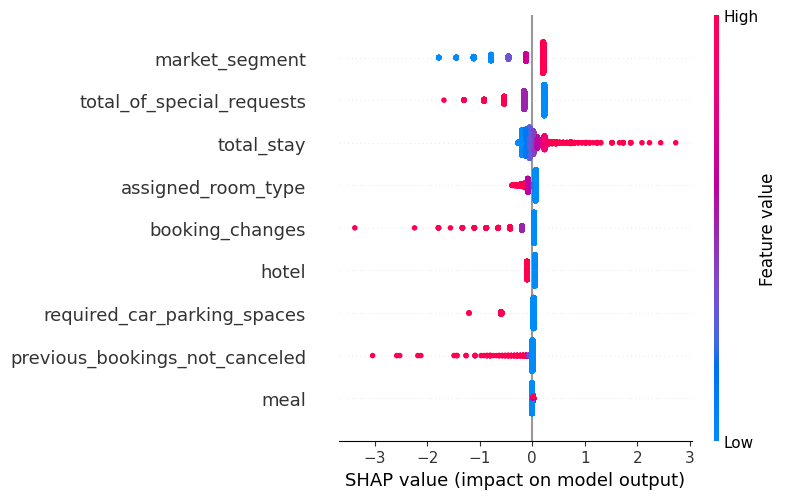

In [30]:
# Use LinearExplainer for logistic regression
import shap
explainer = shap.LinearExplainer(best_logreg_model, X_train_L, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_L)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test_L, feature_names=X_L.columns)

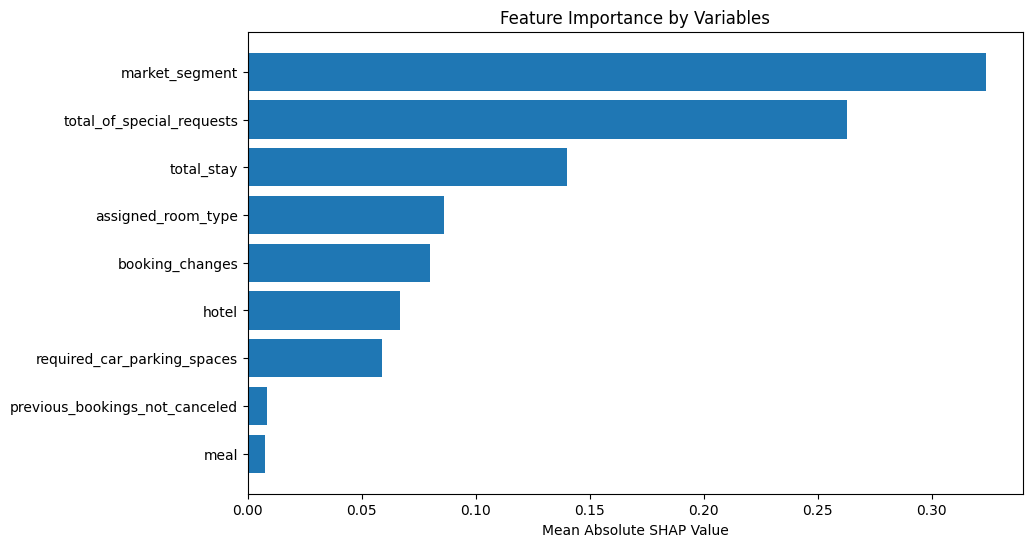

In [31]:
# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)

# Create a DataFrame with feature names and mean absolute SHAP values
feature_importance = pd.DataFrame({'Feature': X_L.columns, 'Importance': mean_abs_shap})

# Sort the DataFrame by Importance
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Plot feature importance in a horizontal bar plot for the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance by Variables')
plt.show()

In [32]:
# Use cross-validation to evaluate the model
kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_logreg_model, X_train_L, y_train_L, cv=kfold_validation, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.63295099 0.63686131 0.63581856 0.65580183 0.62346806 0.6380704
 0.64458931 0.64093872 0.64119948 0.63728814]
Mean CV Accuracy: 0.638698679768827


In [33]:
# Making predictions on the test set
y_pred_L = best_logreg_model.predict(X_test_L)

print('logmodel.classes = ',best_logreg_model.classes_)
print('logmodel.intercept =',best_logreg_model.intercept_.round(3))
print('logmodel.coef =',best_logreg_model.coef_.round(3))

logmodel.classes =  [0 1]
logmodel.intercept = [-1.535]
logmodel.coef = [[ 0.332  0.071  0.007 -0.147 -0.615 -0.057 -0.228 -0.383 -0.05 ]]


In [34]:
# Make predictions
y_pred_L = best_logreg_model.predict(X_test_L)
y_pred_proba_L = best_logreg_model.predict_proba(X_test_L)[:,1]  

# Evaluate the model 
roc_auc = roc_auc_score(y_test_L, y_pred_proba_L).round(3) 
accuracy = accuracy_score(y_test_L, y_pred_L).round(3) 
conf_matrix = confusion_matrix(y_test_L, y_pred_L)
class_report = classification_report(y_test_L, y_pred_L)

# Print the evaluation results
print("ROC AUC Score:", roc_auc)
print(f"Accuracy: {accuracy *100}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Classification Report: \n{class_report}")

ROC AUC Score: 0.703
Accuracy: 63.3
Confusion Matrix: 
[[2752 2111]
 [1407 3319]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      4863
           1       0.61      0.70      0.65      4726

    accuracy                           0.63      9589
   macro avg       0.64      0.63      0.63      9589
weighted avg       0.64      0.63      0.63      9589



### Decision Tree Classifier Model

In [35]:
# Define Features and VIF as transformers
class DecisionTreeFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X, y)

        # Displaying feature importances sorted in descending order
        self.feature_importances_ = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
        return self

    def transform(self, X):
        return X[self.feature_importances_.index], self.feature_importances_

class DecisionTreeVIF(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Calculating Variance Inflation Factor (VIF) for each feature in the feature matrix (X)
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Sorting the VIF values in descending order
        self.vlf_value_ = vif_data.sort_values(ascending=False, by='VIF')
        return self

    def transform(self, X):
        return X[self.vlf_value_['feature']], self.vlf_value_

In [36]:
# Creating a pipeline with the Features and VIF transformers
pipe = make_pipeline(
    DecisionTreeFeatures(),
    DecisionTreeVIF()
)

# Fit and transform the data using the pipeline
result_features, feature_importances = pipe.named_steps['decisiontreefeatures'].fit_transform(X, y)
result_vif, vif_value = pipe.named_steps['decisiontreevif'].fit_transform(X, y)

print("Feature Importances:")
print(feature_importances)

print("\nVIF Values:")
print(vif_value)

Feature Importances:
lead_time                         0.170898
country                           0.160942
adr                               0.097894
arrival_date_day_of_month         0.062365
market_segment                    0.060039
total_of_special_requests         0.058239
arrival_date_week_number          0.057914
required_car_parking_spaces       0.051271
total_stay                        0.034140
arrival_date_year                 0.031423
stays_in_week_nights              0.026315
arrival_date_month                0.023199
assigned_room_type                0.021350
booking_changes                   0.018136
customer_type                     0.017387
stays_in_weekend_nights           0.016971
reserved_room_type                0.014866
adults                            0.011719
meal                              0.011200
previous_cancellations            0.011001
hotel                             0.010940
deposit_type                      0.009555
previous_bookings_not_canceled   

In [37]:
X_D = balanced_dataset[['lead_time', 'country', 'adr', 'arrival_date_day_of_month', 'market_segment', 
                        'total_of_special_requests', 'arrival_date_week_number', 'required_car_parking_spaces', 'total_stay']]
y_D = balanced_dataset['is_canceled']

# Split the dataset into training and testing sets (80% training and 20% testing)
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X_D, y_D, test_size=0.2, random_state=42)

In [38]:
# Create a pipeline with StandardScaler and Decision Tree
Dectree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__max_depth': [5, 7, 9],
    'classifier__min_samples_split': [1, 2, 5],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Use Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(Dectree_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_D, y_train_D)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Decision Tree model with the best hyperparameters
best_tree_model = DecisionTreeClassifier(max_depth = best_params ['classifier__max_depth'],
                                         min_samples_split = best_params ['classifier__min_samples_split'],
                                         min_samples_leaf = best_params ['classifier__min_samples_leaf'])
best_tree_model.fit(X_train_D, y_train_D)

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'classifier__max_depth': 9, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5}


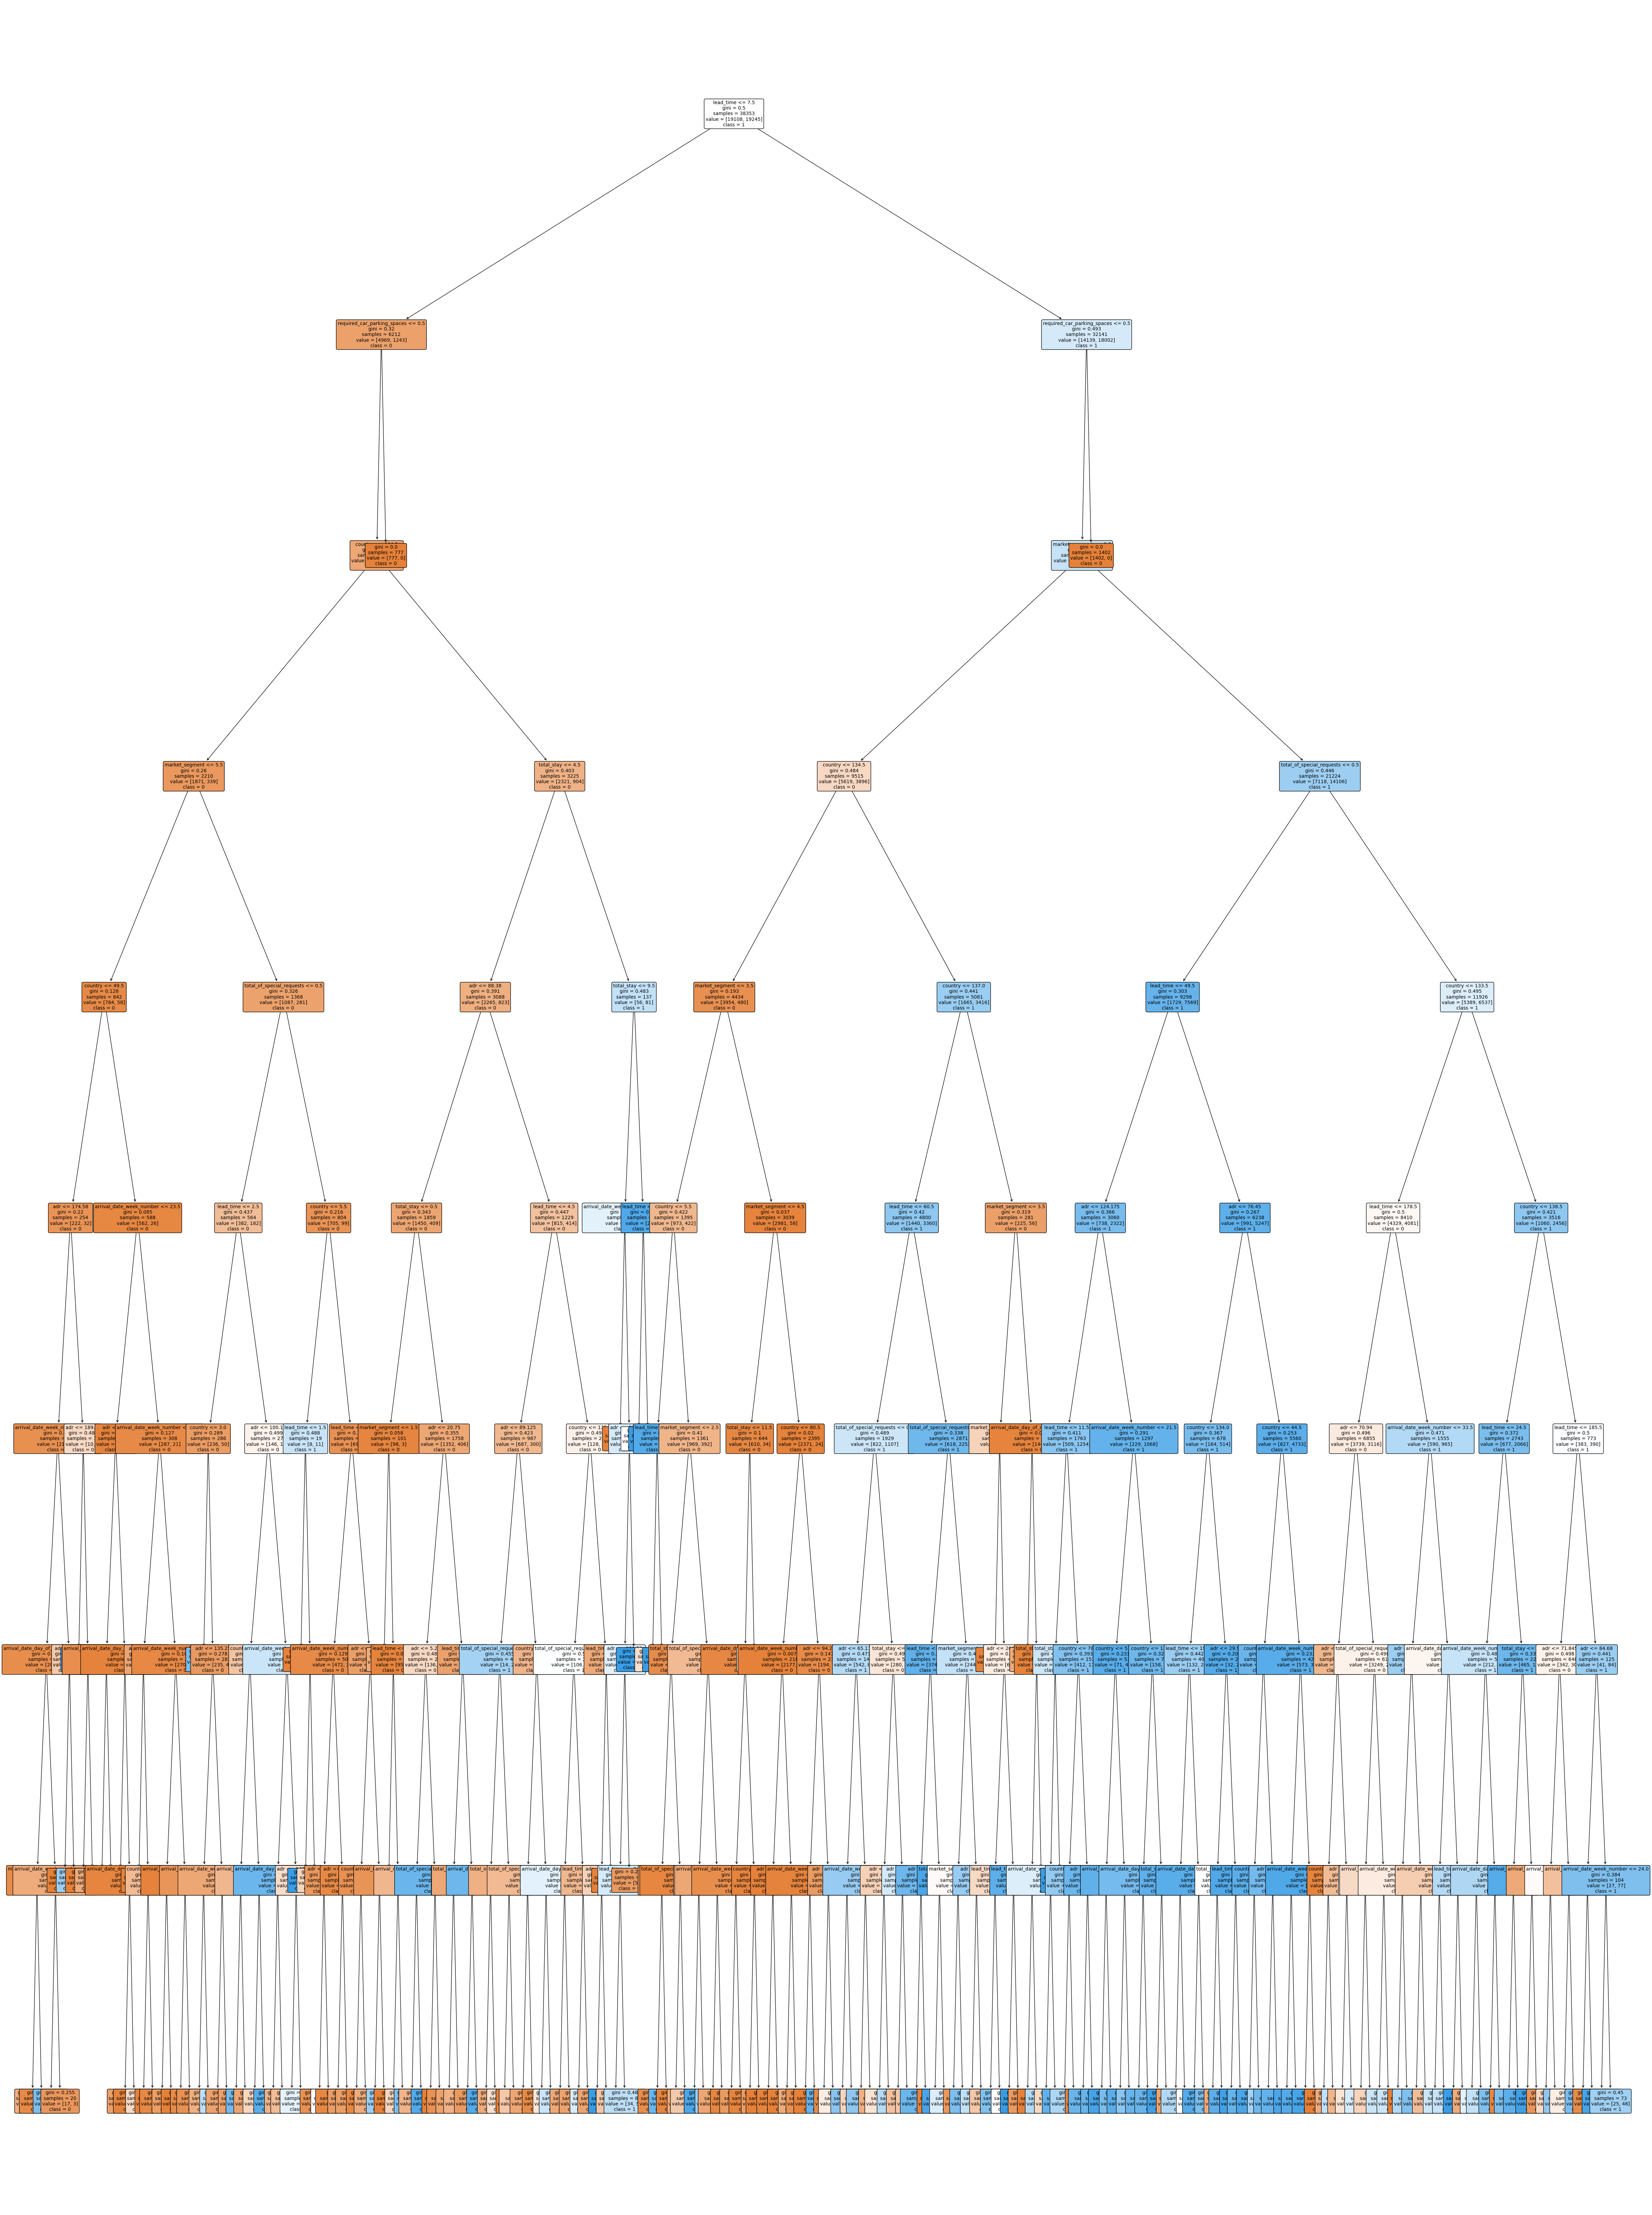

In [39]:
# Extract the DecisionTreeClassifier from the pipeline
best_tree_classifier = grid_search.best_estimator_['classifier']

# Fit the best tree model
best_tree_classifier.fit(X_train_D, y_train_D)

# Plot the Decision Tree
plt.figure(figsize=(60, 84))
plot_tree(best_tree_classifier, feature_names=X_train_D.columns, class_names=list(map(str, best_tree_classifier.classes_)),
          filled=True, rounded=True, fontsize=10)
plt.show()

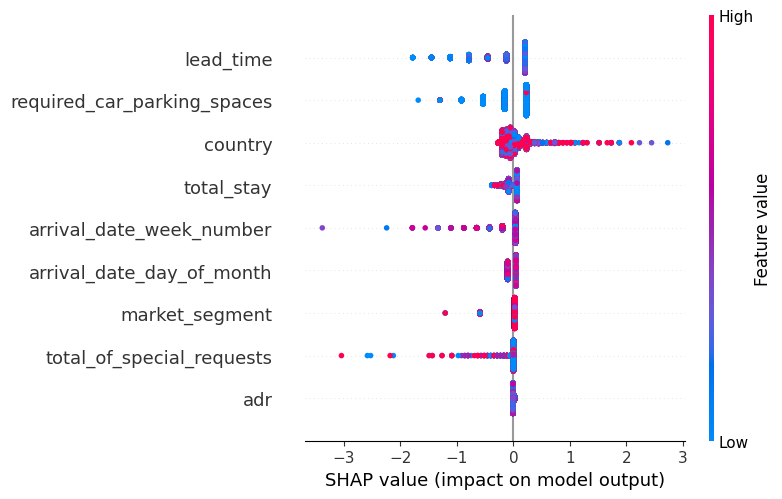

In [40]:
# Use shap.TreeExplainer for tree-based models
explainer = shap.TreeExplainer(best_tree_model)
shap_values_tree = explainer.shap_values(X_test_D)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test_D, feature_names=X_D.columns)

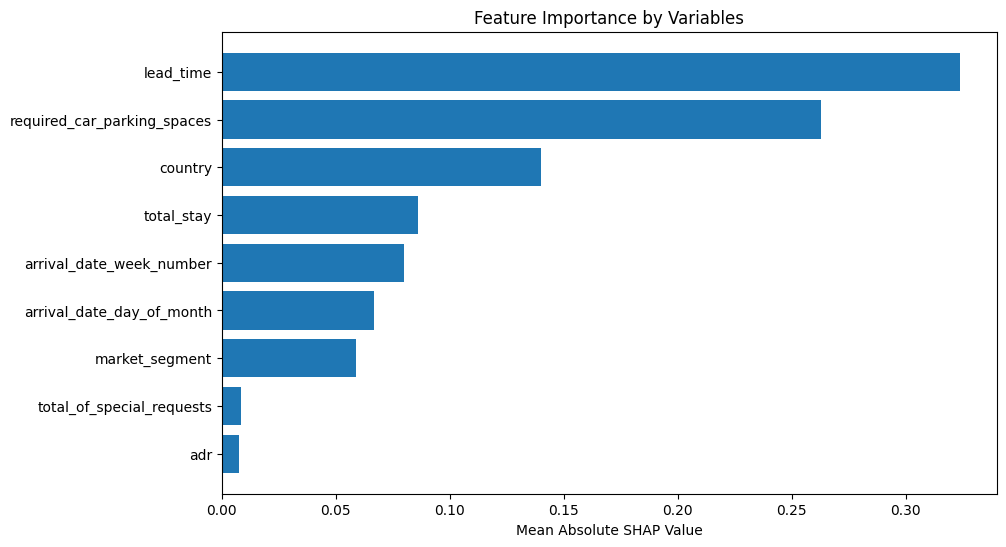

In [41]:
# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)

# Create a DataFrame with feature names and mean absolute SHAP values
feature_importance = pd.DataFrame({'Feature': X_D.columns, 'Importance': mean_abs_shap})

# Sort the DataFrame by Importance
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Plot feature importance in a horizontal bar plot for the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance by Variables')
plt.show()


In [42]:
# Use cross-validation to assess model performance
kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(best_tree_model, X_D, y_D, cv=kfold_validation, scoring='accuracy')
print("Cross-Validation Results:", results.round(3))
print("Mean Accuracy:", np.mean(results).round(3))

Cross-Validation Results: [0.754 0.759 0.764 0.751 0.758 0.761 0.74  0.763 0.744 0.745]
Mean Accuracy: 0.754


In [43]:
# Fit the best model from the grid search to the training data
best_tree_model.fit(X_train_D, y_train_D)

# Make predictions on the test set
y_pred_D = best_tree_model.predict(X_test_D)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test_D, y_pred_D)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_D, y_pred_D)
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test_D, y_pred_D)
print(f'Recall: {recall:.4f}')

f1 = f1_score(y_test_D, y_pred_D)
print(f'F1 Score: {f1:.4f}')

cm = confusion_matrix(y_test_D, y_pred_D)
print(f'Confusion Matrix:\n{cm}')

fpr, tpr, _ = roc_curve(y_test_D, best_tree_model.predict_proba(X_test_D)[:, 1])
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc:.4f}')

print(classification_report(y_test_D, y_pred_D))

Accuracy: 0.7590
Precision: 0.7421
Recall: 0.7831
F1 Score: 0.7621
Confusion Matrix:
[[3577 1286]
 [1025 3701]]
ROC AUC: 0.8402
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      4863
           1       0.74      0.78      0.76      4726

    accuracy                           0.76      9589
   macro avg       0.76      0.76      0.76      9589
weighted avg       0.76      0.76      0.76      9589



### XGBoost Classifier Model

In [44]:
# Define Features and VIF as transformers
class XGBClassifierFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        xgb_model = xgb.XGBClassifier()
        xgb_model.fit(X, y)

        # Displaying feature importances sorted in descending order
        self.feature_importances_ = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
        return self

    def transform(self, X):
        return X[self.feature_importances_.index], self.feature_importances_

class XGBClassifierVIF(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Calculating Variance Inflation Factor (VIF) for each feature in the feature matrix (X)
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        # Sorting the VIF values in descending order
        self.vlf_value_ = vif_data.sort_values(ascending=False, by='VIF')
        return self

    def transform(self, X):
        return X[self.vlf_value_['feature']], self.vlf_value_

In [45]:
# Creating a pipeline with the Features and VIF transformers
pipe = make_pipeline(
    XGBClassifierFeatures(),
    XGBClassifierVIF()
)

# Fit and transform the data using the pipeline
result_features, feature_importances = pipe.named_steps['xgbclassifierfeatures'].fit_transform(X, y)
result_vif, vlf_value = pipe.named_steps['xgbclassifiervif'].fit_transform(X, y)

print("Feature Importances:")
print(feature_importances)

print("\nVIF Values:")
print(vlf_value)

Feature Importances:
required_car_parking_spaces       0.368418
deposit_type                      0.082335
market_segment                    0.078224
total_of_special_requests         0.055191
country                           0.049480
previous_cancellations            0.043787
arrival_date_year                 0.032583
previous_bookings_not_canceled    0.030752
customer_type                     0.029927
booking_changes                   0.029727
lead_time                         0.029210
reserved_room_type                0.020277
hotel                             0.016384
distribution_channel              0.015328
assigned_room_type                0.014262
is_repeated_guest                 0.012496
total_stay                        0.012346
adr                               0.010663
babies                            0.009518
arrival_date_week_number          0.009414
children                          0.007742
meal                              0.006951
arrival_date_month               

In [46]:
X_XG = balanced_dataset[['required_car_parking_spaces', 'market_segment', 'deposit_type', 'total_of_special_requests', 
                        'country', 'previous_cancellations', 'arrival_date_year', 'lead_time', 'previous_bookings_not_canceled',
                        'customer_type', 'booking_changes', 'reserved_room_type']]
y_XG = balanced_dataset['is_canceled']

# Split the dataset into training and testing sets (80% training and 20% testing)
X_train_XG, X_test_XG, y_train_XG, y_test_XG = train_test_split(X_XG, y_XG, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_XG = scaler.fit_transform(X_train_XG)
X_test_XG = scaler.transform(X_test_XG)


In [47]:
# Create a pipeline with StandardScaler and XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])

# Define the hyperparameter search space
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 4, 5]
}

# Initialize the Grid Search model
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_XG, y_train_XG)

# The best hyperparameters from the grid search
best_parameters = grid_search.best_params_


# Create a new XGBoost model with the best hyperparameters
best_XGB_model = XGBClassifier(estimators=best_parameters['xgb__n_estimators'], learning_rate=best_parameters['xgb__learning_rate'],max_depth=best_parameters['xgb__max_depth'])
best_XGB_model.fit(X_train_XG, y_train_XG)

print(f"Best Hyperparameters:{best_parameters}")

Best Hyperparameters:{'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}


 95%|=================== | 9151/9589 [00:19<00:00]       

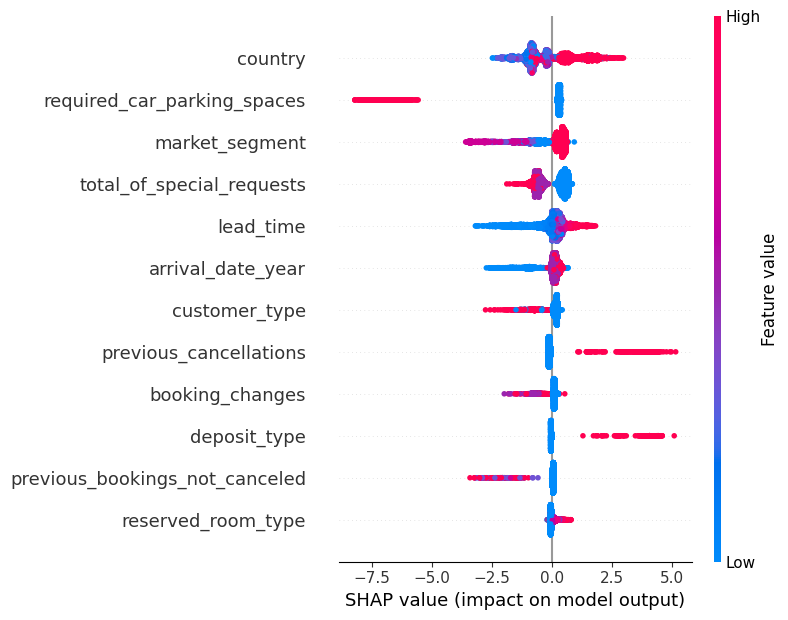

In [48]:
# Create the SHAP explainer for the XGBoost model
explainer = shap.Explainer(best_XGB_model, X_train_XG, feature_dependence="independent")

# Calculate SHAP values for the test set
shap_values_xg = explainer(X_test_XG)

# Summary plot with feature names
shap.summary_plot(shap_values_xg, X_test_XG, feature_names=X_XG.columns)

In [49]:
# Extract the SHAP values from the Explanation object
shap_values_array = shap_values_xg.values

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap = np.mean(np.abs(shap_values_array), axis=0)

# Now, create the DataFrame with feature names and mean absolute SHAP values
feature_importance = pd.DataFrame({'Feature': X_XG.columns, 'Importance': mean_abs_shap})

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot the feature importance for the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:20], feature_importance['Importance'][:20])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance by Variables')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()


In [50]:
# Use cross-validation to assess model performance
kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(best_XGB_model,  X_train_XG, y_train_XG, cv=kfold_validation, scoring='accuracy')
print("Cross-Validation Results:", results.round(3))
print("Mean Accuracy:", np.mean(results).round(3))

Cross-Validation Results: [0.788 0.792 0.788 0.798 0.793 0.784 0.796 0.796 0.784 0.791]
Mean Accuracy: 0.791


In [51]:
# Make predictions
y_pred_XG = best_XGB_model.predict(X_test_XG)
y_pred_proba_XG = best_XGB_model.predict_proba(X_test_XG)[:,1]  

# Evaluate the model 
roc_auc = roc_auc_score(y_test_XG, y_pred_proba_XG).round(3) 
accuracy = accuracy_score(y_test_XG, y_pred_XG).round(3) 
conf_matrix = confusion_matrix(y_test_XG, y_pred_XG)
class_report = classification_report(y_test_XG, y_pred_XG)

# Print the evaluation results
print("ROC AUC Score:", roc_auc)
print(f"Accuracy: {accuracy *100}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Classification Report: \n{class_report}")

ROC AUC Score: 0.884
Accuracy: 79.3
Confusion Matrix: 
[[3732 1131]
 [ 851 3875]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      4863
           1       0.77      0.82      0.80      4726

    accuracy                           0.79      9589
   macro avg       0.79      0.79      0.79      9589
weighted avg       0.79      0.79      0.79      9589

